# SLE_SDY997_1_cluster_B

B cells 对Bcell进行亚群的分析

In [1]:
library(cowplot)
source(file.path('~/link/res_publish','func_r_map_seurat.r'))
item = 'SLE_SDY997_B'
p_root_item = file.path('.')
p_plot_item = file.path(p_root_item,'fig')
if(!dir.exists(p_plot_item)){
    dir.create(p_plot_item,recursive = TRUE)
}

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::lag()       masks stats::lag()
✖ lubridate::stamp() masks cowplot::stamp()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: SeuratObject

Loading required package: sp

‘SeuratObject’ was built under R 4.3.2 but the current version is
4.3.3; it is recomended that you reinstall ‘SeuratObject’ as the ABI
for R may have changed

‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed


Attaching packag


> function----------------------------------------
serurat_to_mtx

> Map_Seurat function-----------------------------
Map_Seurat_normalize
Map_Seurat_cluster
Map_Seurat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap
show_
savefig
seurat_metadata_leftjoin
seurat_gene_detect


In [2]:
if(file.exists(file.path(p_root_item,'SLE_SDY997_B.rds'))){
    cat(sprintf('[read] rds and markers\n'))
    adata = readRDS(file.path(p_root_item,'SLE_SDY997_B.rds'))
    adata@meta.data = adata@meta.data %>% mutate(pre_cell_type = cell_type) %>%
        select(-cell_type,nCount_RNA,nFeature_RNA)
    markers = read_csv('markers_B.csv')

}else{
    adata = load_seuratobj(file.path(p_cache,'disease','SLE_h_SDY997_imm_B'))
    adata[["percent.mt"]] = PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
    options(repr.plot.width = 3*6,repr.plot.height = 1*6)
    VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)
    # 标准流程
    adata@meta.data %>% head(2)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_normalize(adata)
    # function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
    options(repr.plot.width = 1*6,repr.plot.height = 1*6)
    adata = Map_Seurat_cluster_run_harmony(
        adata,dims=1:10,resolution = 0.5,
        key_batch = 'X_batch')
    # marker
    adata@meta.data %>% head(2)
    markers = FindAllMarkers(adata)
    markers %>% write_csv('markers_B.csv')
    saveRDS(adata,file.path(p_root_item,'SLE_SDY997_B.rds'))
}
markers = markers %>% select(gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
filter(p_val_adj < 0.05 ,avg_log2FC > 1,pct.1 > 0.5) %>% 
arrange(cluster,desc(avg_log2FC)) %>% mutate(
    cluster = as.character(cluster)
)
markers %>% head(2)

[read] rds and markers


Rows: 10282 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): gene
dbl (6): p_val, avg_log2FC, pct.1, pct.2, p_val_adj, cluster

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
SCIMP,0,1.449812,0.752,0.384,1.371880e-10
CD82,0,1.446727,0.606,0.313,2.132285e-06


[out][plot] SLE_SDY997_B_harmony.png
	in ./fig


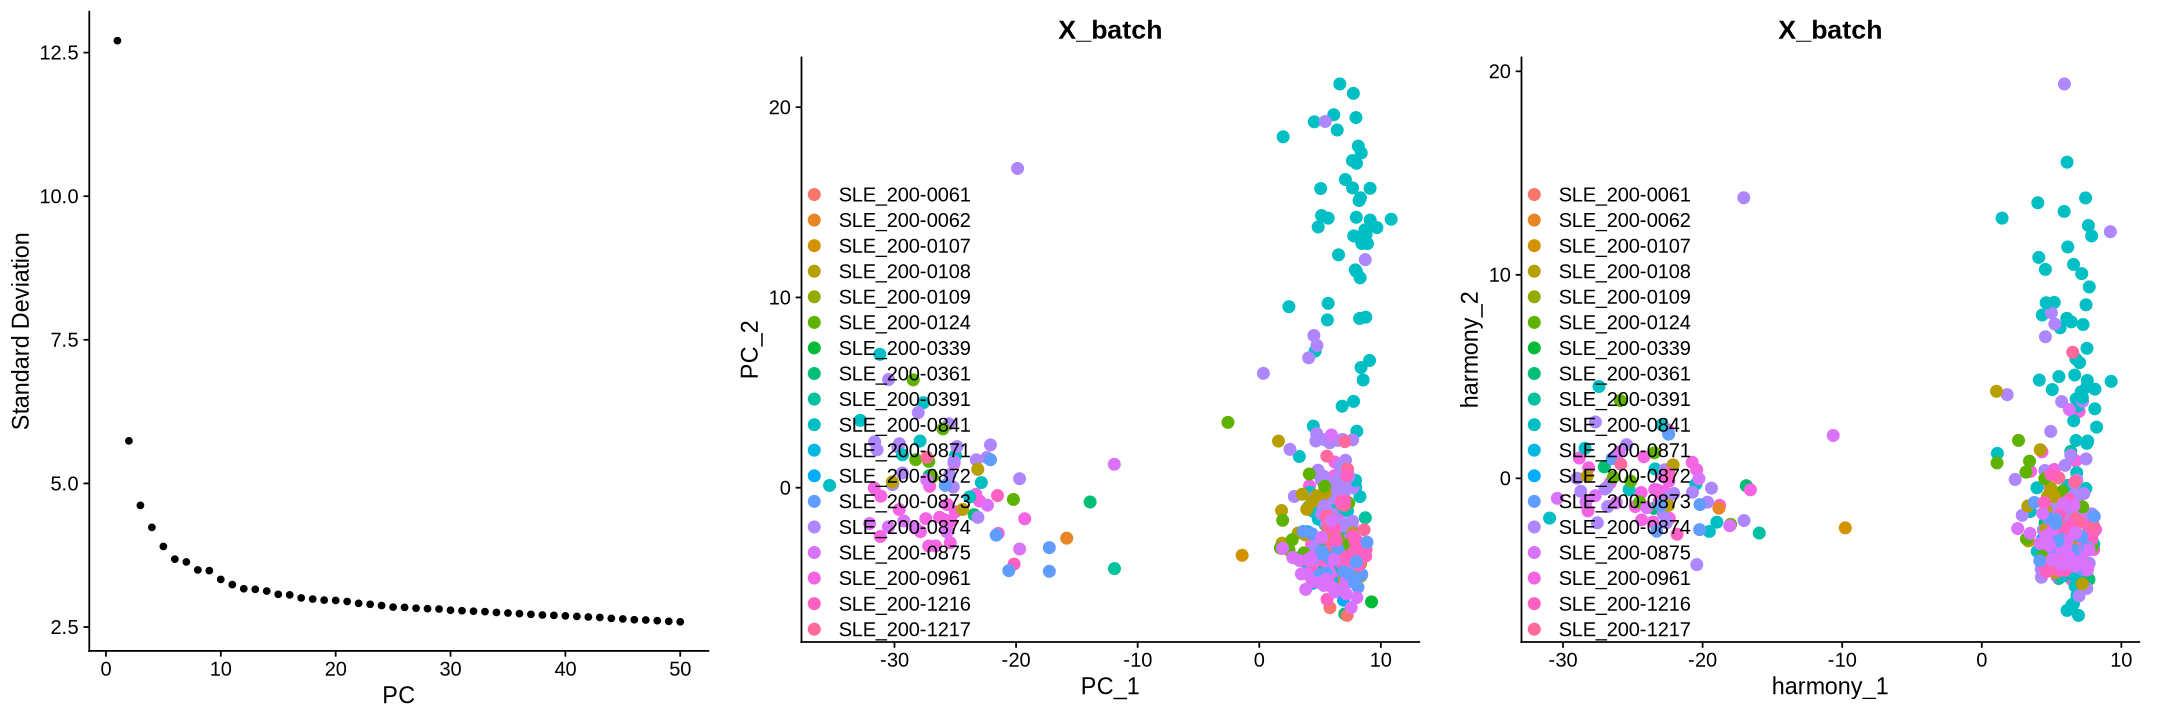

In [3]:
options(repr.plot.width = 6 * 3,repr.plot.height = 6)
p1 = ElbowPlot(adata,ndims = 50)
p2 =  DimPlot(object = adata, reduction = "pca",, group.by = 'X_batch',
        pt.size =3) + them_legend
p3 = DimPlot(object = adata, reduction = "harmony",, group.by = 'X_batch',
        pt.size =3) + them_legend
p=cowplot::plot_grid(p1,p2,p3,nrow=1,ncol=3)
p
savefig(p,sprintf('%s_harmony.png',item),p_plot_item,width_ratio = 4*3)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,status,disease,sample,pre_sub_cell_type,pre_cell_type,pre_sub_cell_type_id,percent.mt,RNA_snn_res.0.5,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
K005_L1Q1_E03,K005_L1Q1_E03,K005,3754,1797,SLE_200-0109,SLE,SLE,200-0109,Naive B cells,B cell,CB2a,15.13053,1,1
K005_L1Q1_E11,K005_L1Q1_E11,K005,2264,1243,SLE_200-0109,SLE,SLE,200-0109,Naive B cells,B cell,CB2a,13.20671,0,0


[out][plot] SLE_SDY997_B_umap_sub_cluster.png
	in ./fig


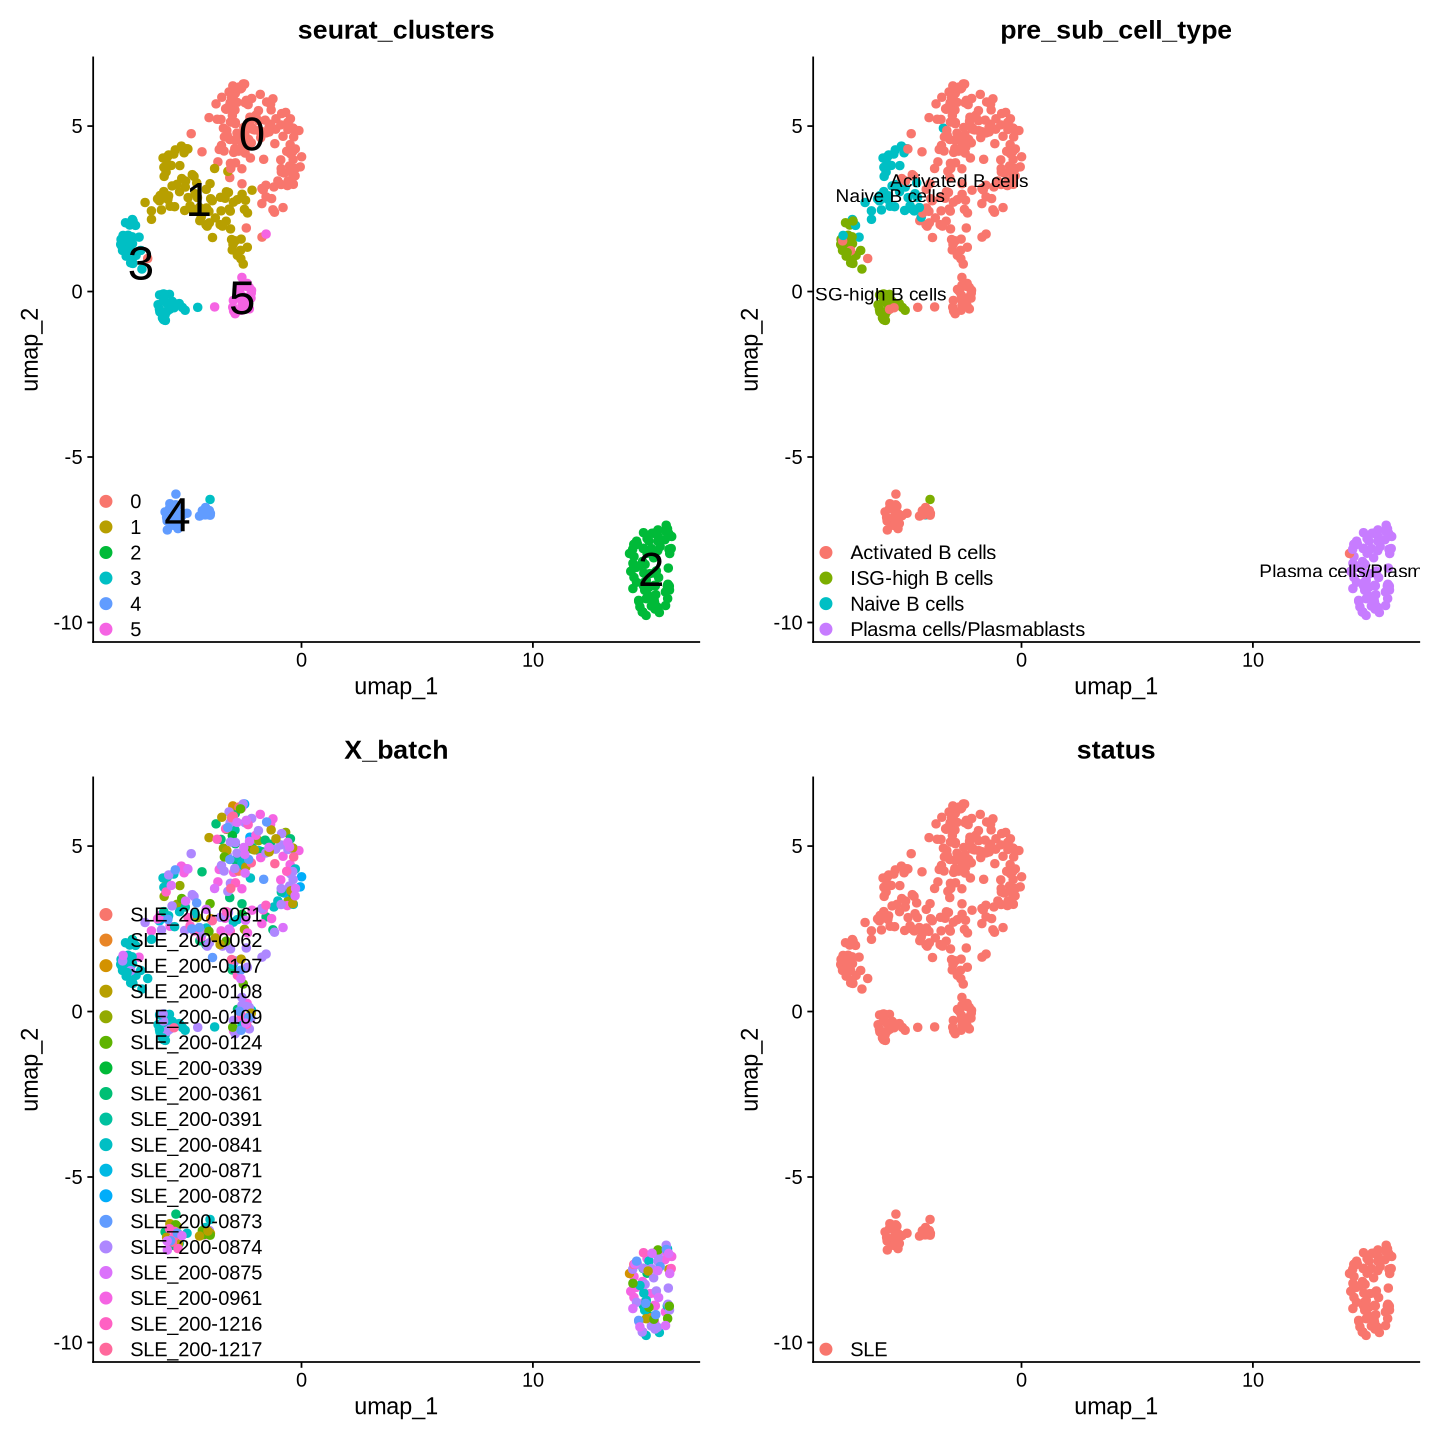

In [4]:
# adata <- adata  %>% FindClusters(resolution = 0.5, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 2*6)
adata@meta.data %>% head(2)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =2) + them_legend
p2 = UMAPPlot(adata,group.by='pre_sub_cell_type',label =TRUE,label.size=4,
              pt.size =2) + them_legend
p3 = UMAPPlot(adata,group.by='X_batch',pt.size =2) + them_legend
p4 = UMAPPlot(adata,group.by='status',pt.size =2) + them_legend
p=cowplot::plot_grid(p1,p2,p3,p4,nrow=2,ncol=2)
p
savefig(p,
        sprintf('%s_umap_sub_cluster.png',item),p_plot_item,
        width_ratio = 2*4,height_ratio = 2*4)

# query_markers

In [5]:
# [marker identify] B cells,T cells,NK cells,macrophages
# [?] DCs,Dividings cells,Epithelial cells
q_cluster = '5'
markers %>% filter(cluster==q_cluster) %>% head(20) %>% arrange(desc(pct.1))

gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ZEB2,5,1.866764,0.96,0.407,3.169125e-06
PLEK,5,1.767606,0.96,0.537,2.276273e-05
HCK,5,2.495263,0.88,0.191,1.087921e-12
FGR,5,2.249631,0.84,0.234,7.618953e-08
TNFRSF1B,5,2.043254,0.84,0.331,6.626900e-05
PEA15,5,1.906766,0.80,0.290,8.261151e-05
ITGAX,5,3.372847,0.76,0.117,5.932177e-15
FCRL3,5,1.890223,0.76,0.328,1.510628e-02
SIGLEC10,5,1.840906,0.76,0.226,8.964325e-05


# plot markers

In [6]:
temp = adata@assays$RNA@features  %>% as.data.frame
temp = temp %>% mutate(gene = rownames(temp),.before = 1)
temp %>% filter(str_detect(gene,'CD3[A-Z]'))

,gene,counts,data,scale.data
,<chr>,<lgl>,<lgl>,<lgl>
CD3D,CD3D,TRUE,TRUE,TRUE
CD3E,CD3E,TRUE,TRUE,TRUE
CD3EAP,CD3EAP,TRUE,TRUE,FALSE
CD3G,CD3G,TRUE,TRUE,TRUE


In [7]:
tbl_cell_type <- tribble(
  ~seurat_clusters, ~cell_type,~sub_cell_type,
'0','B cell','B activated',
'1','B cell','B naive',
'2','plasma cell','plasma cell',
'3','B cell','B naive ISG-high',
'4','polluted(T cell)','polluted(T cell)', # 混进了82个T细胞,怕不是污染了
'5','B cell','B activated'
)

adata@meta.data = adata@meta.data %>% select(cell_name,orig.ident,X_batch,status,
    disease,sample,pre_sub_cell_type,pre_sub_cell_type_id,
    pre_cell_type,seurat_clusters)
adata@meta.data = adata@meta.data %>% mutate(
        seurat_clusters = as.character(seurat_clusters)) %>%
    left_join(tbl_cell_type,by=c('seurat_clusters' = 'seurat_clusters'))
rownames(adata@meta.data) = adata@meta.data$cell_name
adata@meta.data %>% group_by(cell_type) %>% count
adata@meta.data %>% group_by(sub_cell_type) %>% count

adata@meta.data %>% head(2)

cell_type,n
<chr>,<int>
B cell,305
plasma cell,82
polluted(T cell),31


sub_cell_type,n
<chr>,<int>
B activated,162
B naive,90
B naive ISG-high,53
plasma cell,82
polluted(T cell),31


,cell_name,orig.ident,X_batch,status,disease,sample,pre_sub_cell_type,pre_sub_cell_type_id,pre_cell_type,seurat_clusters,cell_type,sub_cell_type
,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
K005_L1Q1_E03,K005_L1Q1_E03,K005,SLE_200-0109,SLE,SLE,200-0109,Naive B cells,CB2a,B cell,1,B cell,B naive
K005_L1Q1_E11,K005_L1Q1_E11,K005,SLE_200-0109,SLE,SLE,200-0109,Naive B cells,CB2a,B cell,0,B cell,B activated


[out][plot] SLE_SDY997_B_umap_sub_cluster.png
	in ./fig


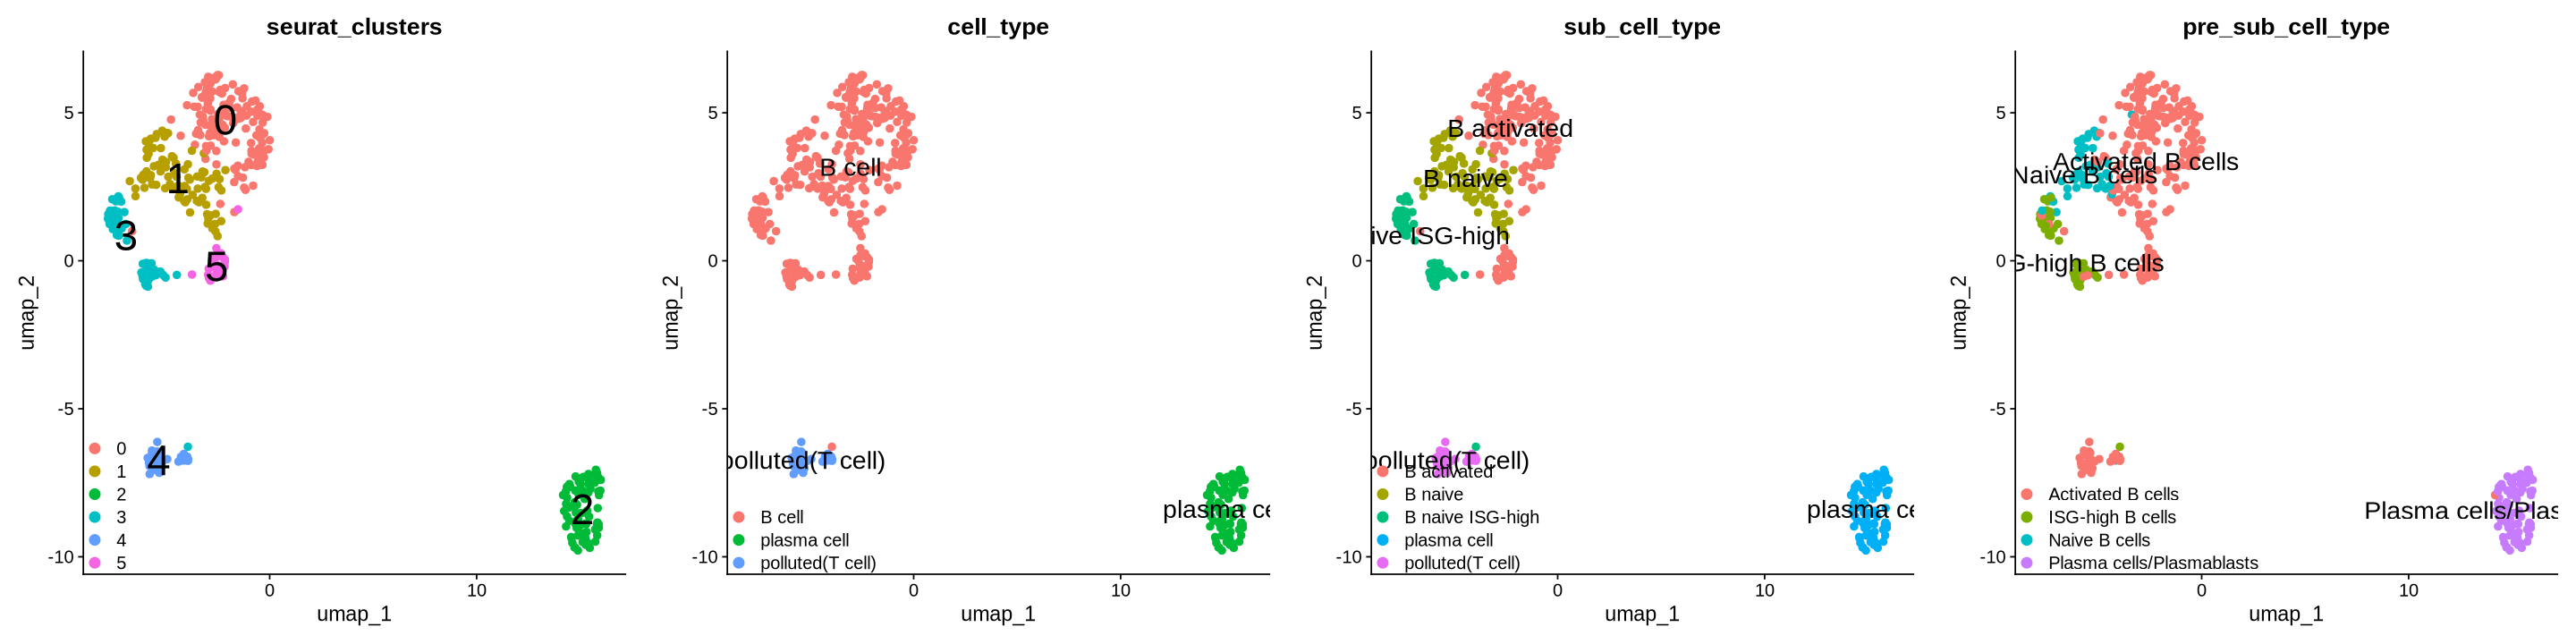

In [8]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 4*6,repr.plot.height = 1*6)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size = 2) + them_legend
p2 = UMAPPlot(adata,group.by='cell_type',label =TRUE,label.size=6,
              pt.size = 2) + them_legend
p3 = UMAPPlot(adata,group.by='sub_cell_type',label =TRUE,label.size=6,
              pt.size = 2) + them_legend
p4 = UMAPPlot(adata,group.by='pre_sub_cell_type',label =TRUE,label.size=6,
              pt.size = 2) + them_legend
p_temp = cowplot::plot_grid(p1,p2,p3,p4,nrow=1,ncol=4)
p_temp
savefig(p_temp,sprintf('%s_umap_sub_cluster.png',item),p_plot_item,
        width_ratio = 6*4,height=6*1)

[知乎:B细胞知识点全面详解](https://zhuanlan.zhihu.com/p/693378027)

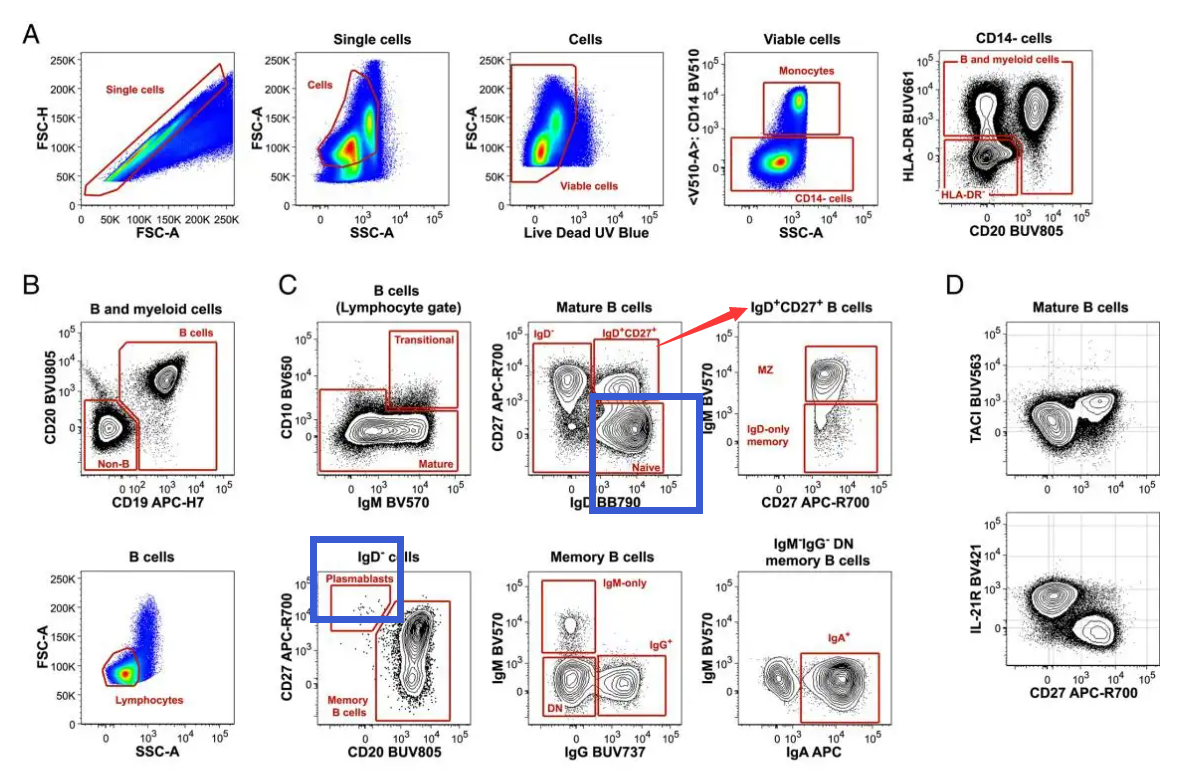

gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
FCRL5,5,1.704144,1.00,0.649,3.642286e-05
FCRLA,5,1.284660,1.00,0.532,2.214736e-02
AHNAK,5,1.276234,1.00,0.547,2.302541e-03
POU2F2,5,1.070623,1.00,0.903,9.728308e-04
ZEB2,5,1.866764,0.96,0.407,3.169125e-06
PLEK,5,1.767606,0.96,0.537,2.276273e-05
LBH,5,1.546797,0.96,0.550,1.269798e-02
IFI30,5,1.421490,0.96,0.700,7.123643e-03
SYK,5,1.357503,0.96,0.690,1.130500e-02


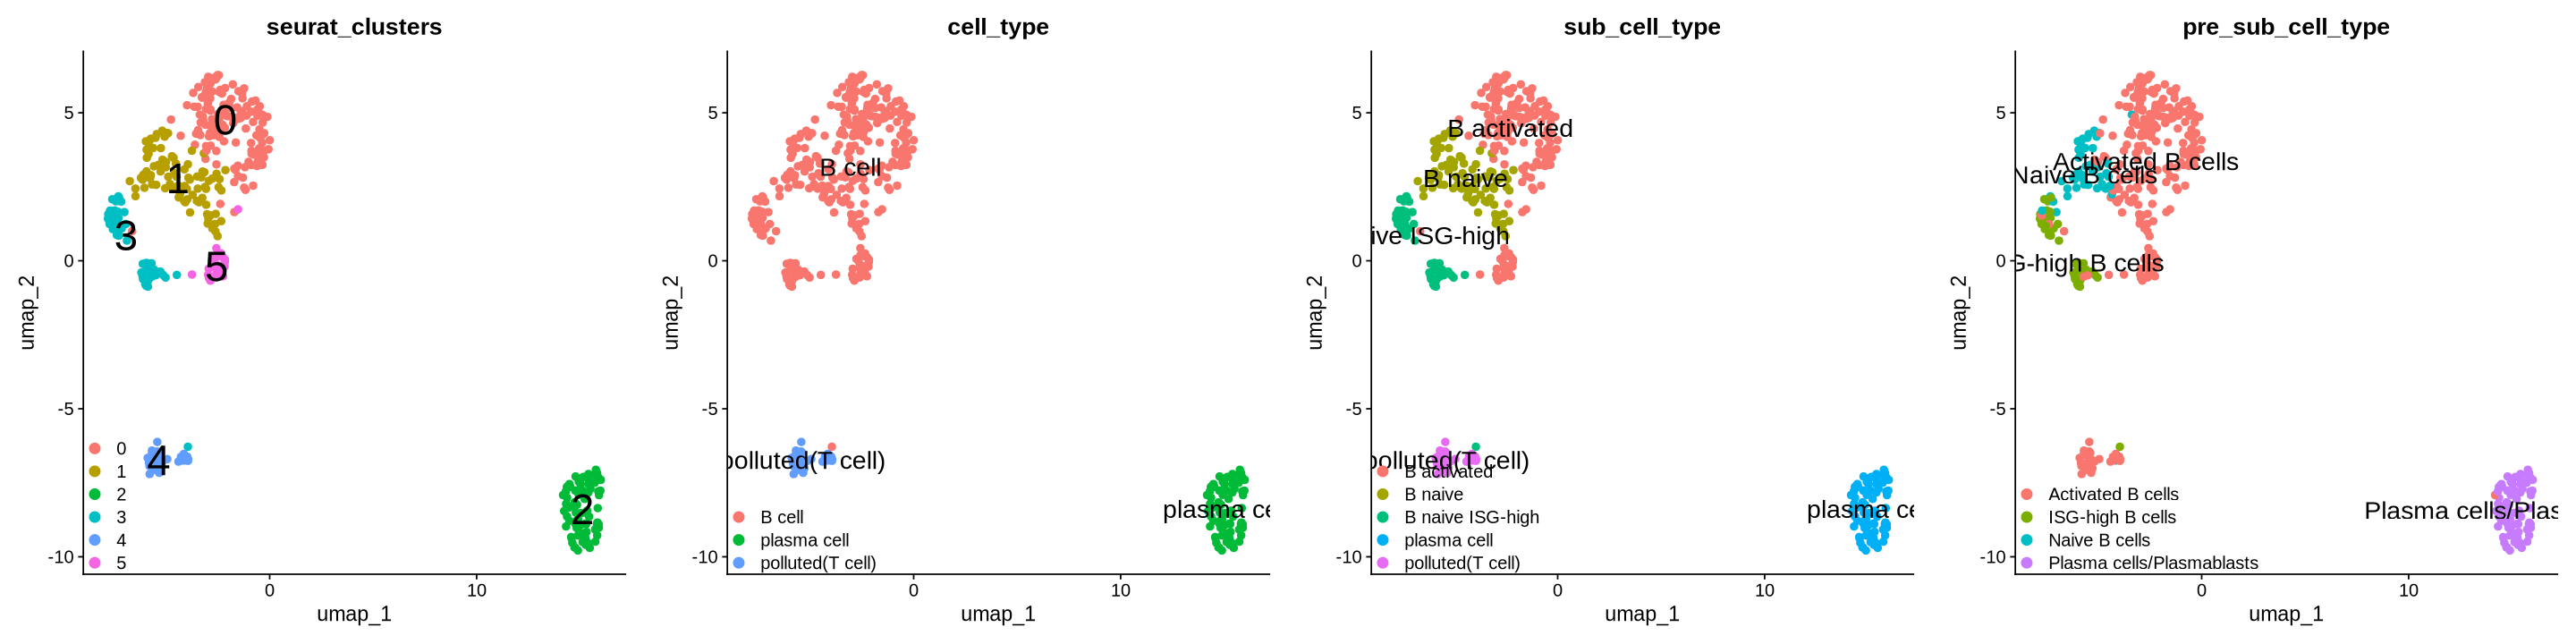

In [9]:
options(repr.plot.width = 4*6,repr.plot.height = 1*6)
p_temp
# temp %>% filter(str_detect(gene,'^ROR'))
markers %>% filter(cluster == '5') %>% arrange(desc(pct.1)) #%>% filter(str_detect(gene,'^CC'))
# markers %>% filter(gene == 'CD69')

In [10]:
tbl_marker <- bind_rows(
  tibble(
    'cell_type' = 'T cell',
    'gene' = str_split('CD3D,CD3E,CD3G,CD4,CD8A,CD8B', ',')[[1]]
),tibble(
    'cell_type' = 'B cell',
    'gene' = str_split('CD19,CD40,CD79A,CD79B', ',')[[1]]
),tibble(
    'cell_type' = 'IFN',
    'gene' = str_split('STAT1,ISG15,ISG20,IFIT1,IFIT3', ',')[[1]]
),tibble(
    'cell_type' = 'naive B',# IGHD+ CD27-
    'gene' = str_split('IGHM,IGHD,CD27', ',')[[1]]
),tibble(
    'cell_type' = 'plasma cell',# IGHD- CD27+
      # CD138编码CD138
    'gene' = str_split('SDC1,IGHD,CD27', ',')[[1]]
)
)
cat(sprintf('[pre_sub_cell_type]--------------------\n\t%s\n',
           paste(unique(adata@meta.data$pre_sub_cell_type),collapse = ',')))
cat(sprintf('[sub_cell_type]--------------------\n\t%s\n',
            paste(unique(tbl_marker$cell_type),collapse = ',')))

[pre_sub_cell_type]--------------------
	Naive B cells,Activated B cells,Plasma cells/Plasmablasts,ISG-high B cells
[sub_cell_type]--------------------
	T cell,B cell,IFN,naive B,plasma cell


In [11]:
seurat_gene_detect(adata,'^SDC1')

,counts,data,scale.data,gene
,<lgl>,<lgl>,<lgl>,<chr>
SDC1,TRUE,TRUE,TRUE,SDC1


gene,cluster,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
IFIT3,3,3.707300,0.962,0.329,1.472058e-27
IFIT1,3,3.645657,0.962,0.386,9.235561e-27
ISG15,3,3.146521,0.962,0.460,5.198252e-22
ISG20,3,2.020828,0.981,0.671,6.730209e-16
STAT1,3,2.012141,0.981,0.740,6.388424e-17


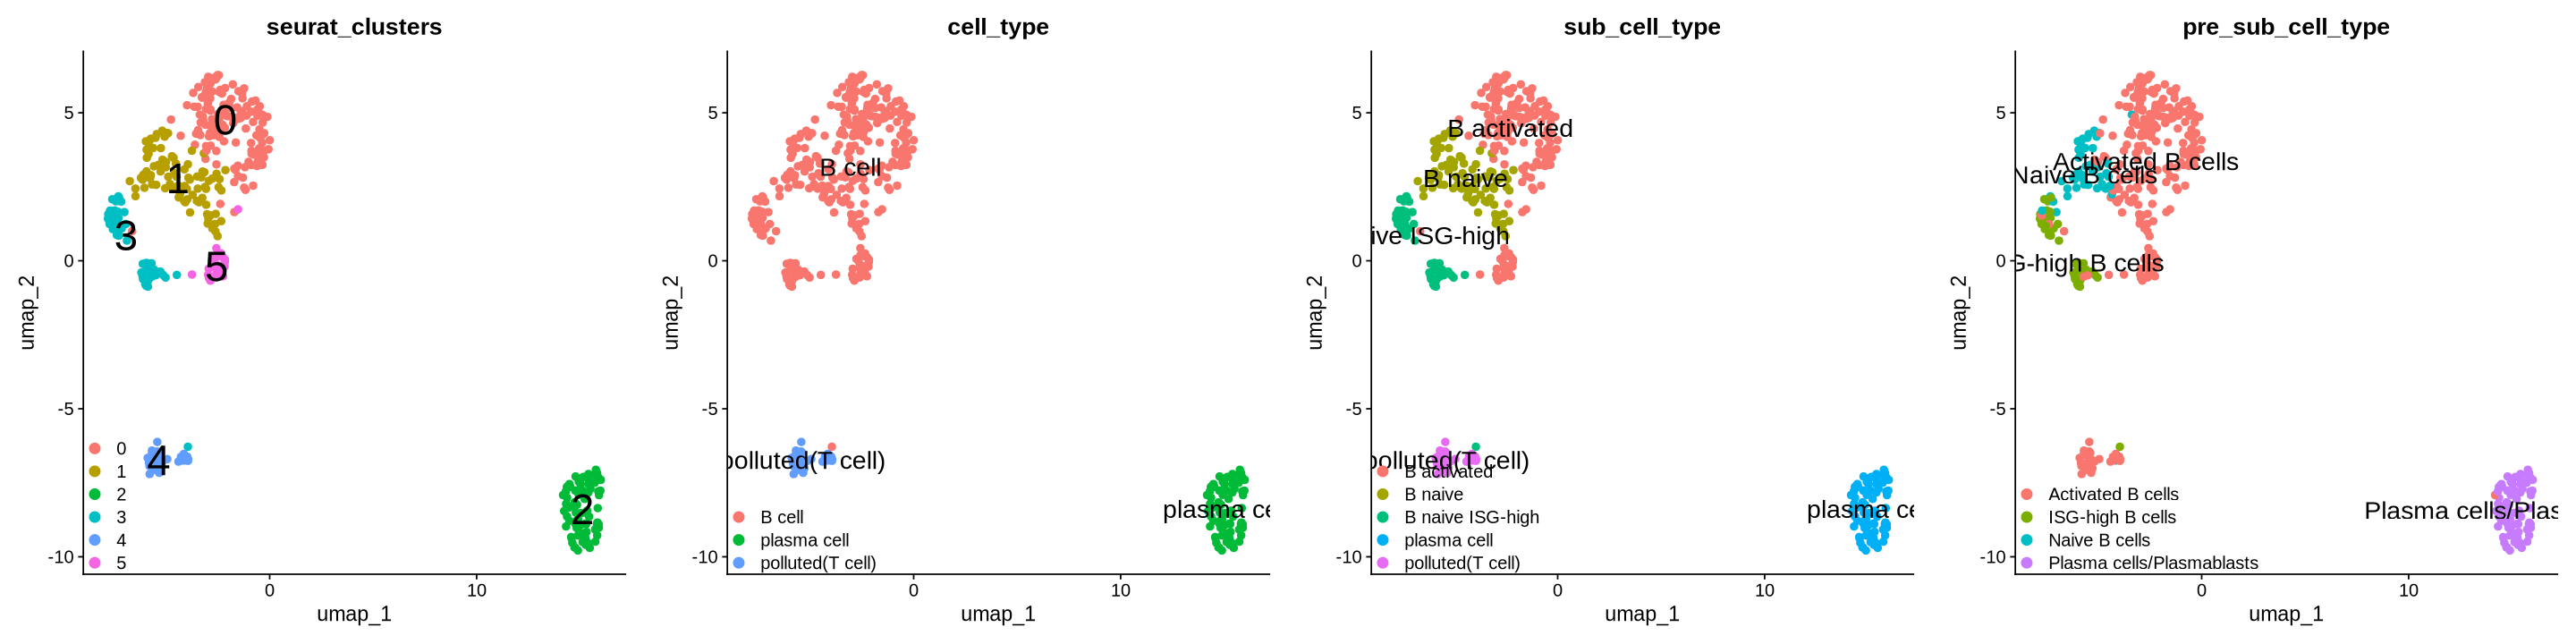

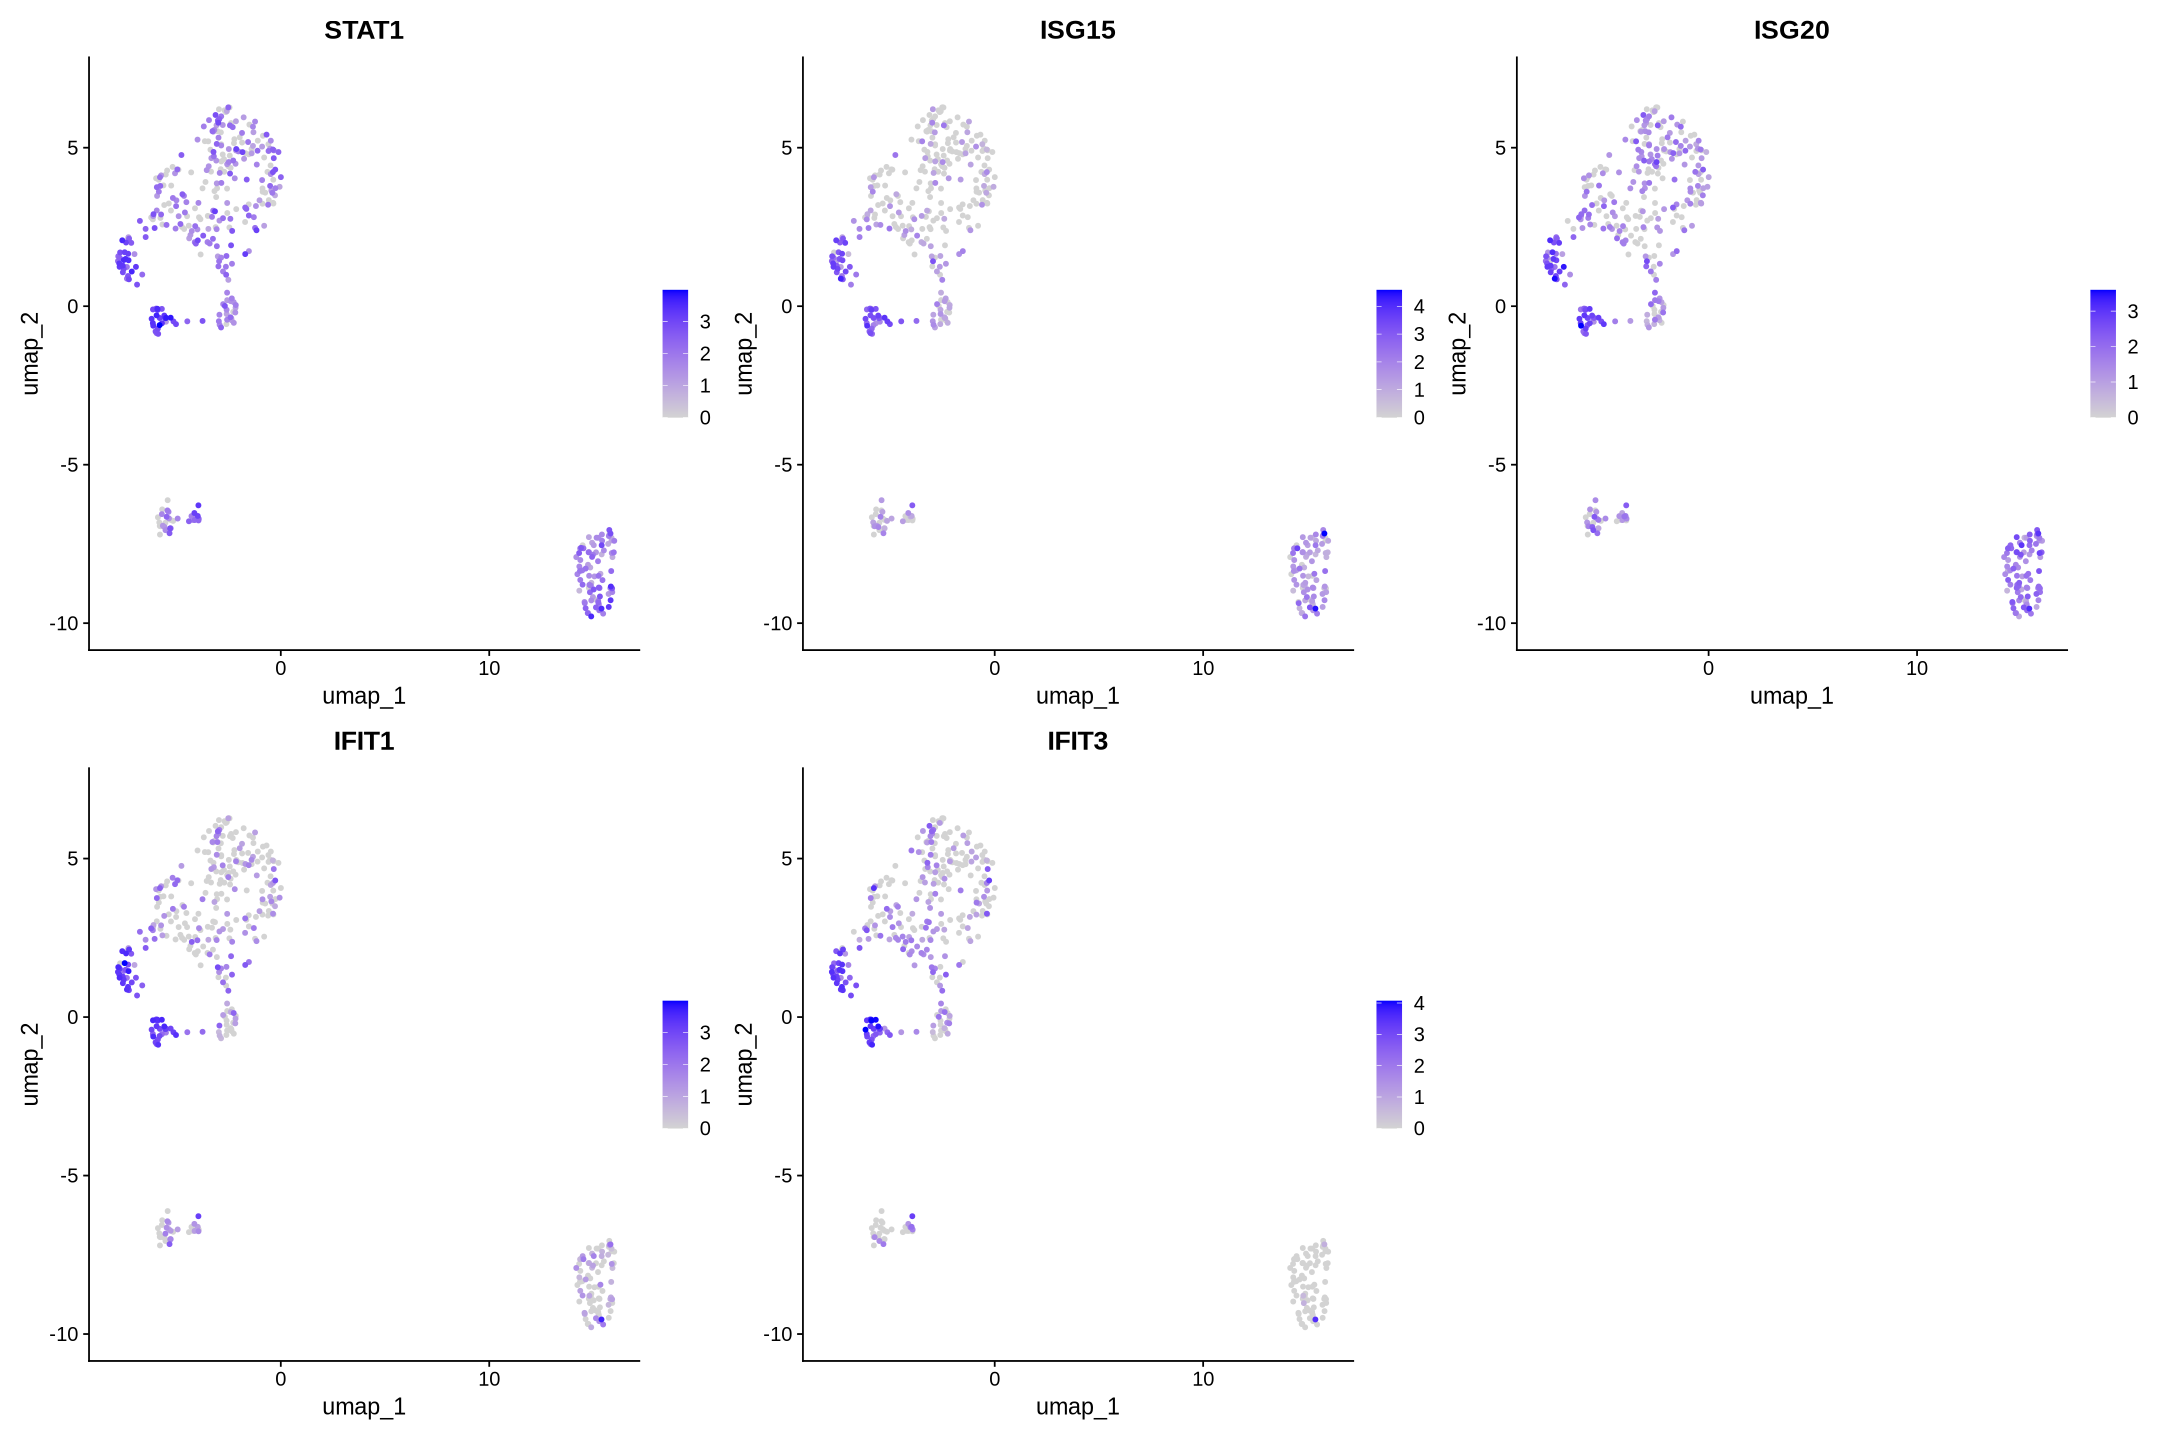

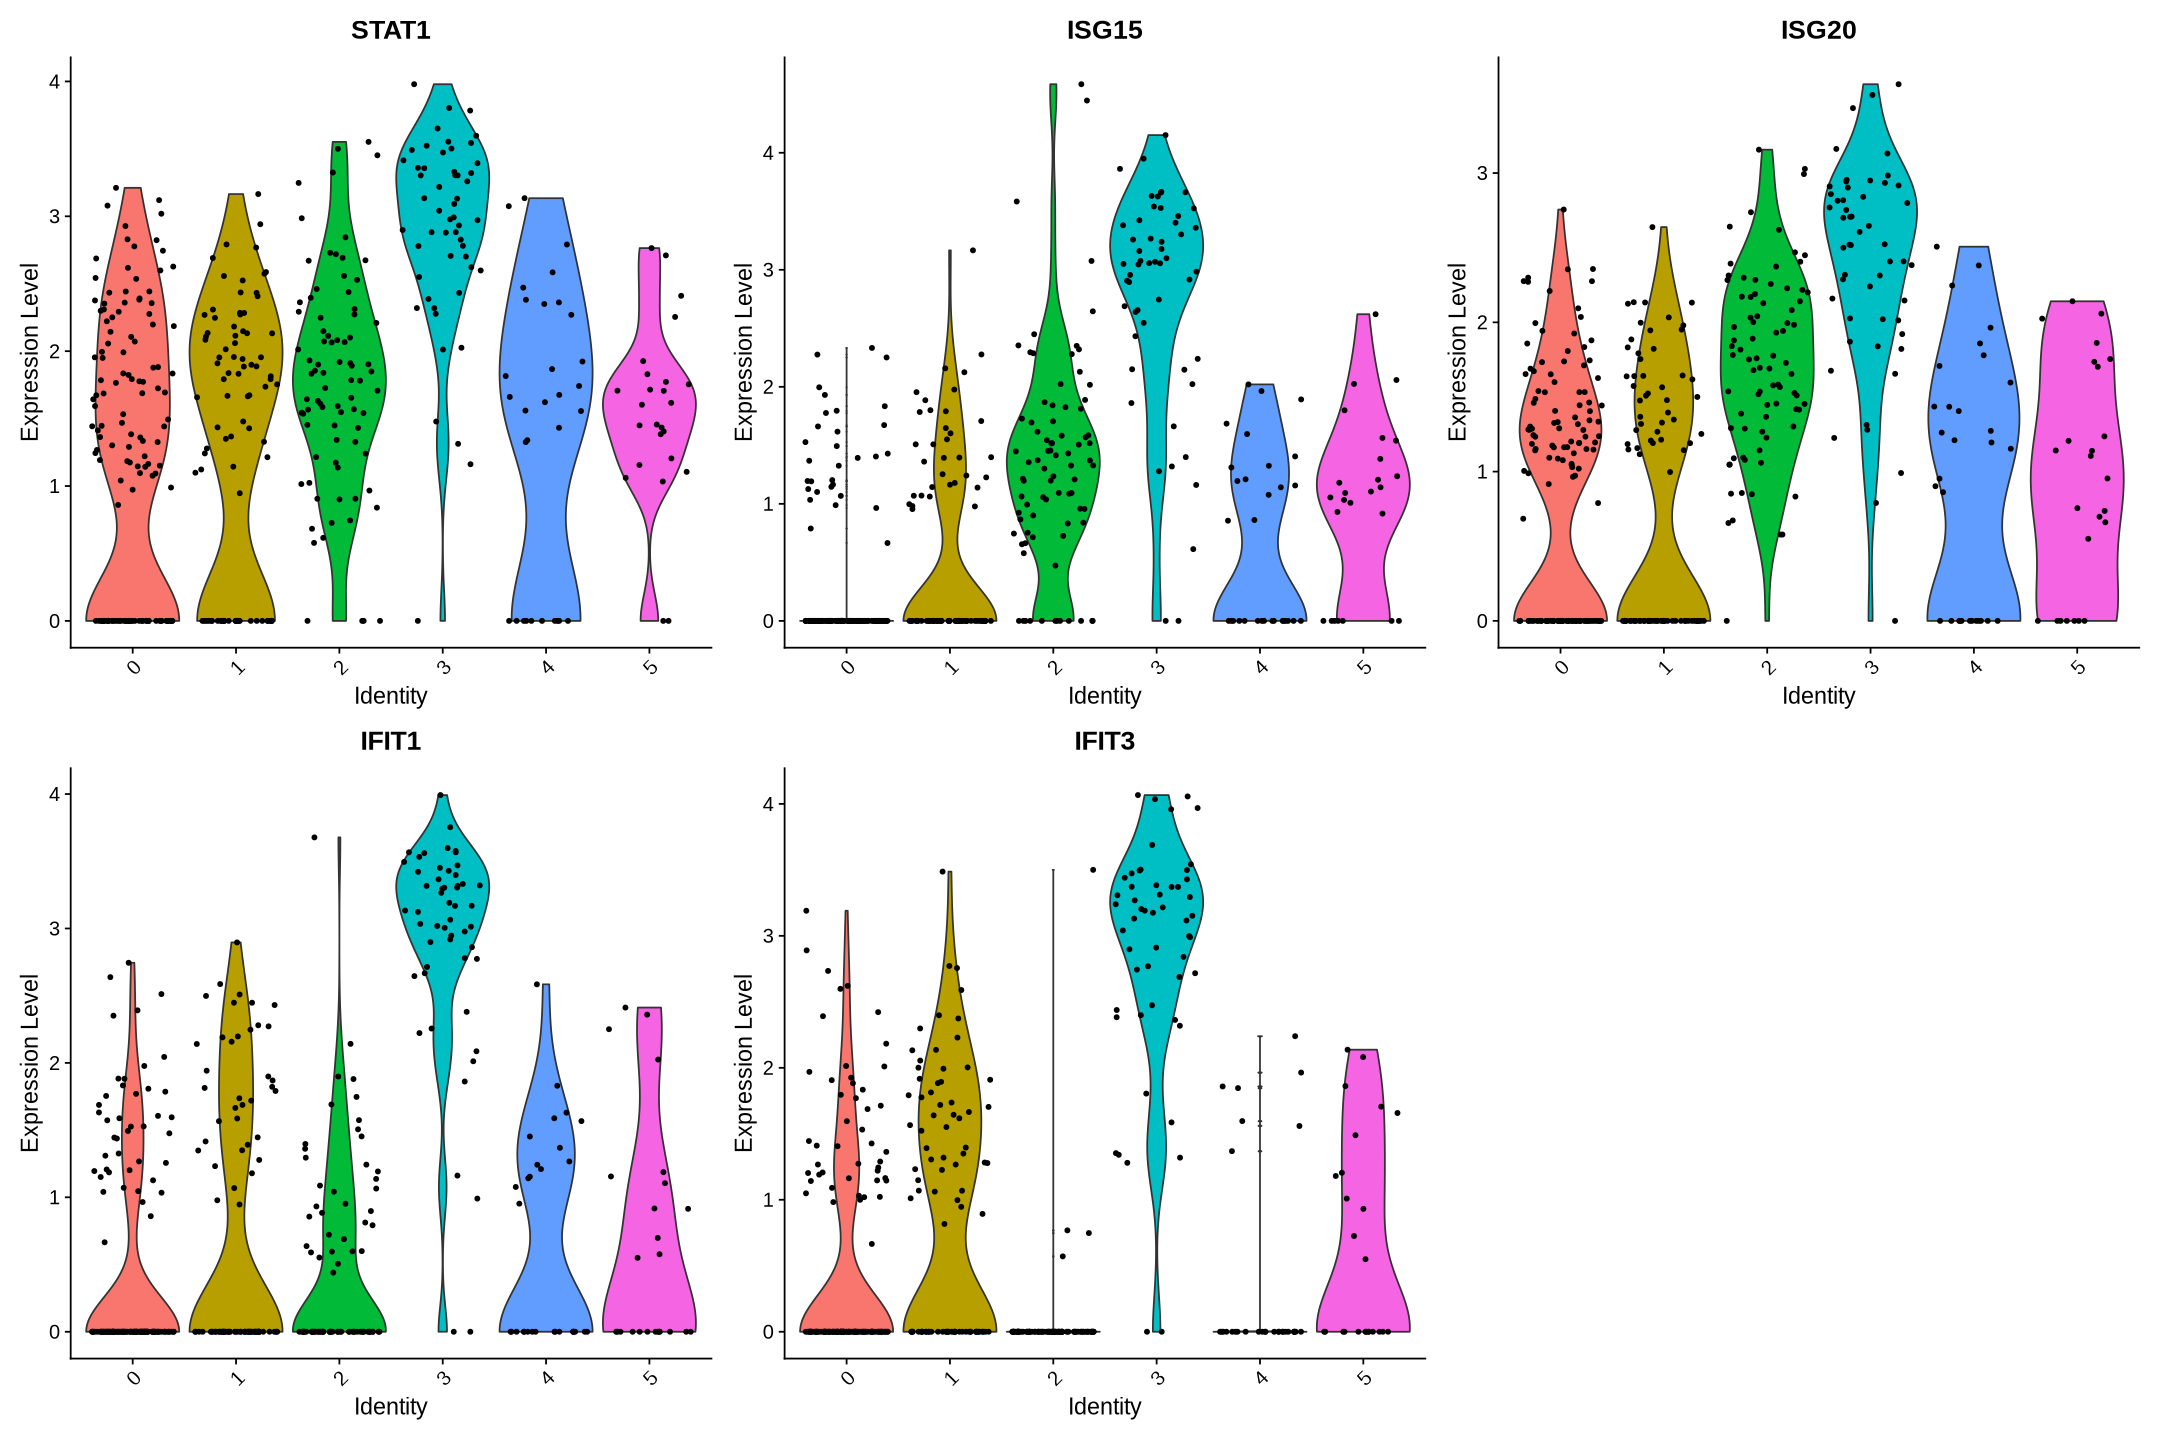

In [12]:
genes <- filter(tbl_marker, cell_type == 'IFN')$gene
# genes <- str_split('CD4,CD8A,CD8B,CCR7,IL7R,SELL,ZBTB7B',',')[[1]]
markers %>% filter(gene %in% genes) %>% arrange(cluster,desc(avg_log2FC))
options(repr.plot.width = 4*6,repr.plot.height = 1*6)
p_temp
ncol_ <- 3
nrow_ <- ifelse(length(genes) %% 3 == 0,
                floor(length(genes) %/% 3), floor(length(genes) %/% 3) + 1)
options(repr.plot.width = 6*ncol_, repr.plot.height=6 * nrow_)
p = FeaturePlot(adata, features = genes, ncol = 3,pt.size = 1,order = TRUE)
p
# savefig(p,
#         sprintf('%s_marker.png',item),p_plot_item,
#         width_ratio = 6*ncol_,
#         height_ratio = 6*nrow_)
p = VlnPlot(adata,features = genes, ncol = 3,pt.size = 1)
p
# tbl_marker %>% write_csv(file.path(p_root_item,'markers_plot.csv'))
# cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_plot.csv')))

# 提取UMAP坐标后，保存metadata

仅保存`cell_name,seurat_clusters,cell_type,sub_cell_type,UMAP1,UMAP2`

存为`obs_Seurat.csv`

In [13]:
df_umap = adata@reductions$umap@cell.embeddings %>% as.data.frame
df_umap = df_umap %>% mutate(
    cell_name = rownames(df_umap),.before=1
) %>% rename(UMAP1=umap_1,UMAP2=umap_2)
df_umap %>% head(2)
adata@meta.data %>% group_by(sub_cell_type) %>% summarise(
    count = n()
)
## 防止重新运行时文件被覆盖
adata@meta.data %>% 
    select(cell_name,seurat_clusters,cell_type,sub_cell_type) %>%
    left_join(df_umap,by= c('cell_name' = 'cell_name'))  %>% 
    write_csv(file.path(p_root_item,'obs_Seurat_B.csv'))
cat(sprintf('[out] %s\n',file.path(p_root_item,'obs_Seurat_B.csv')))

,cell_name,UMAP1,UMAP2
,<chr>,<dbl>,<dbl>
K005_L1Q1_E03,K005_L1Q1_E03,-5.857691,3.990549
K005_L1Q1_E11,K005_L1Q1_E11,-3.374539,4.937973


sub_cell_type,count
<chr>,<int>
B activated,162
B naive,90
B naive ISG-high,53
plasma cell,82
polluted(T cell),31


[out] ./obs_Seurat_B.csv


In [14]:
cat('----------------------------------------
[finish]
----------------------------------------
')

----------------------------------------
[finish]
----------------------------------------
